# **Titanic - Exploratory Data Analysis**
Author: André Paiva (Xornotor)

## 1 - Libraries, configs and definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
mpl.rcParams['figure.dpi'] = 100

### 1.1 - Data Dictionary (Source: Kaggle)

| Variable | Definition                               | Key                                            |
|----------|------------------------------------------|------------------------------------------------|
| Survived | Survival                                 | 0 = No, 1 = Yes                                |
| Pclass   | Ticket Class                             | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                      |                                                |
| Age      | Age in Years                             |                                                |
| sibsp    | # of siblings/spouses aboard the Titanic |                                                |
| parch    | # of parents/children aboard the Titanic |                                                |
| Ticket   | Ticket number                            |                                                |
| Fare     | Passenger fare                           |                                                |
| Cabin    | Cabin number                             |                                                |
| Embarked | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

## 2 - Data splits importing

In [2]:
df_train_full = pd.read_csv('./data/train.csv', index_col='PassengerId')
df_train_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test_full = pd.read_csv('./data/test.csv', index_col='PassengerId')
df_test_full.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3 - Data splits filtering

In [4]:
df_train_filtered = df_train_full[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
with pd.option_context('mode.chained_assignment', None):
    df_train_filtered[['Pclass']] = df_train_filtered[['Pclass']].astype('category')
    df_train_filtered[['Embarked']] = df_train_filtered[['Embarked']].astype('category')
    df_train_filtered[['Sex']] = df_train_filtered[['Sex']].astype('category')
    df_train_filtered[['Survived']] = df_train_filtered[['Survived']].astype('int')
print(f'Data types on filtered training set:\n{df_train_filtered.dtypes}\n')
print(f'Missing data on filtered training set:\n{df_train_filtered.isna().sum()}\n')

Data types on filtered training set:
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Survived       int64
dtype: object

Missing data on filtered training set:
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64



In [5]:
df_test_filtered = df_test_full[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
with pd.option_context('mode.chained_assignment', None):
    df_test_filtered[['Pclass']] = df_test_filtered[['Pclass']].astype('category')
    df_test_filtered[['Embarked']] = df_test_filtered[['Embarked']].astype('category')
    df_test_filtered[['Sex']] = df_test_filtered[['Sex']].astype('category')
print(f'Data types on filtered test set:\n{df_test_filtered.dtypes}\n')
print(f'Missing data on filtered test set:\n{df_test_filtered.isna().sum()}\n')

Data types on filtered test set:
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

Missing data on filtered test set:
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64



## 4 - What is the age distribution?

/tmp/ipykernel_20695/1266818488.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


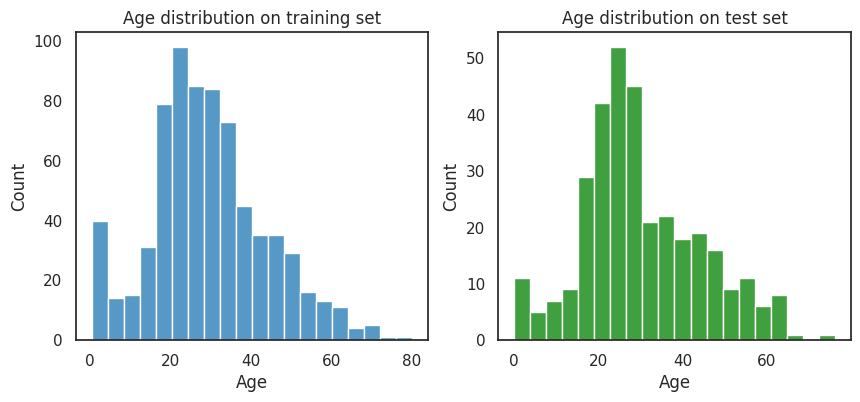

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_train_filtered, x='Age', ax=ax[0], bins=20)
sns.histplot(df_test_filtered, x='Age', ax=ax[1], bins=20, color='green')
ax[0].set_title('Age distribution on training set')
ax[1].set_title('Age distribution on test set')
fig.show()

## 5 - How is the age distribution of the survivors? (Training set)

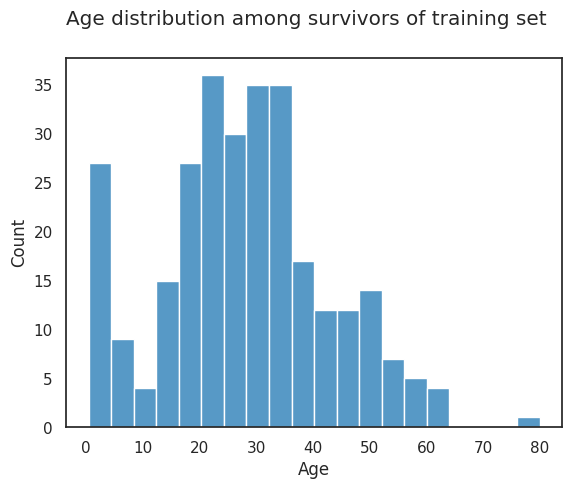

In [7]:
sns.histplot(df_train_filtered[df_train_filtered["Survived"] == 1],
             x='Age', bins=20)
plt.suptitle("Age distribution among survivors of training set")
plt.show()

## 6 - What the fare amount by age look like?

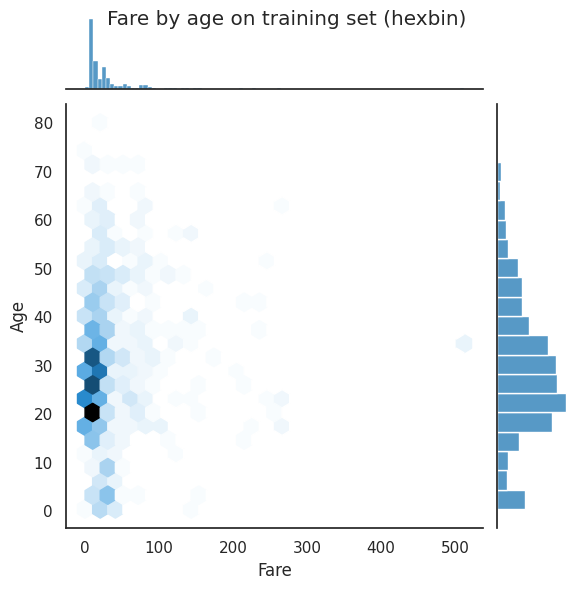

In [8]:
sns.jointplot(df_train_filtered, x='Fare', y='Age', kind='hex',
              joint_kws={'gridsize': 25})
plt.suptitle('Fare by age on training set (hexbin)')
plt.show()

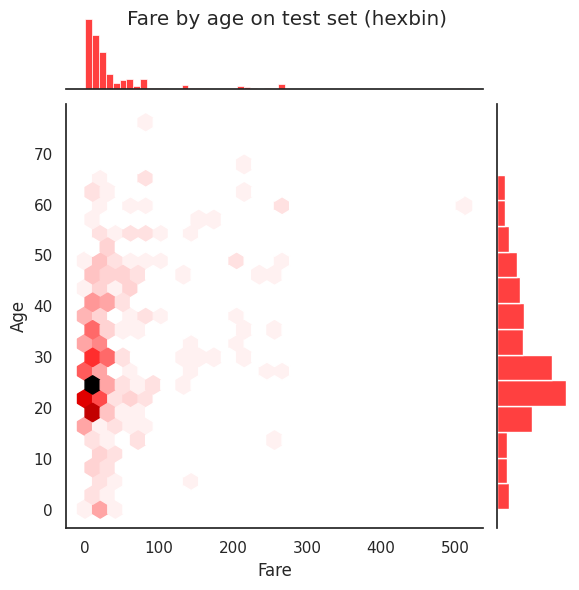

In [9]:
sns.jointplot(df_test_filtered, x='Fare', y='Age', kind='hex', color='red',
              joint_kws={'gridsize': 25})
plt.suptitle('Fare by age on test set (hexbin)')
plt.show()

## 7 - Amongst the survivors, what the fare amount by age look like? (Training set)

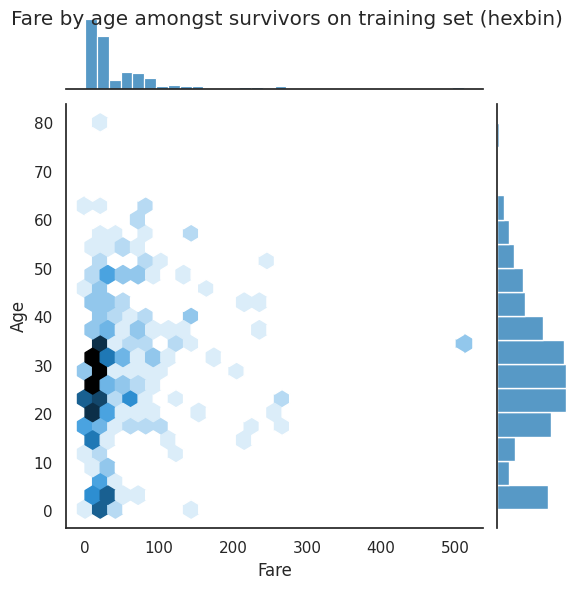

In [10]:
train_survivors = df_train_filtered[df_train_filtered['Survived'] == 1]
sns.jointplot(train_survivors, x='Fare', y='Age', kind='hex',
              joint_kws={'gridsize': 25})
plt.suptitle('Fare by age amongst survivors on training set (hexbin)')
plt.show()

## 8 - How does the amount of people by gender look like? How much of the people survived? (Training set)

/tmp/ipykernel_20695/2350074350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_gender = df_train_filtered.groupby(["Sex", "Survived"]).size().reset_index().pivot(columns='Survived', index='Sex', values=0)


<Axes: xlabel='Sex'>

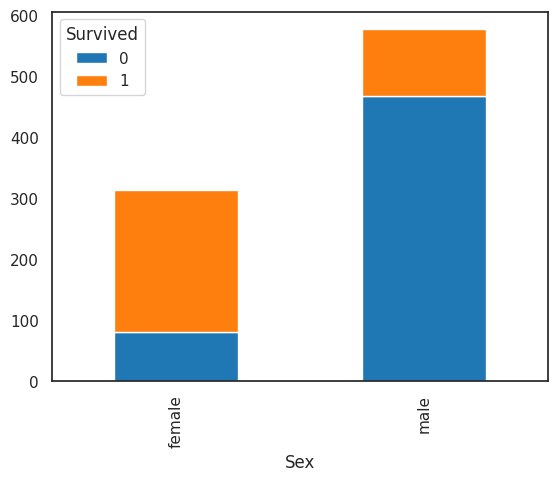

In [11]:
survivors_by_gender = df_train_filtered.groupby(["Sex", "Survived"]).size().reset_index().pivot(columns='Survived', index='Sex', values=0)
survivors_by_gender.plot(kind='bar', stacked=True)

## 9 - What are the correlation among the numerical variables in the training set?

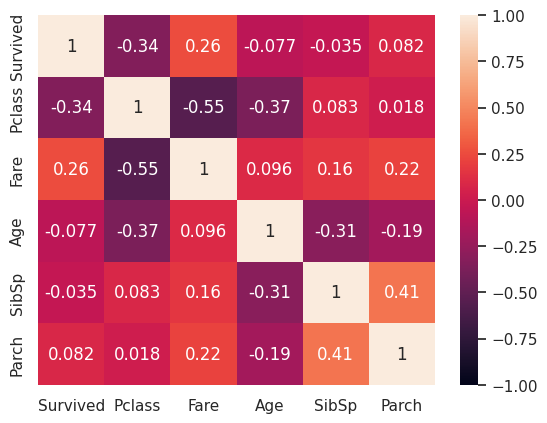

In [12]:
sns.heatmap(df_train_filtered[["Survived", "Pclass", "Fare", "Age", "SibSp", "Parch"]].corr(),
            vmin=-1, vmax=1, annot=True)
plt.show()